<h1>
<center>Navid Bahadoran</center>
</h1>
<h1>
<center>Homework 2, due September 20th, 11:59pm</center>
</h1>

<h2>
<center>September 14, 2023</center>
</h2>


1. In this problem we use the abalone dataset available on Canvas. The dataset
is about predicting the age of the abalone from its physical measurements. Use the first
7 variables as predictors and the 8-th as the response.
Report all results as the average of 20 random splits. For each random split divide
the data at random into 85% for training and 15% for testing, train the models and
compute the training error and the test error (or $R^2$) for that split. Repeat this process
20 times obtaining 20 different random splits of the data and report the average training
or test $MSE$ or $R^2$ obtained over the 20 splits for the following models:

**a) Null model. Report the average train and test MSE of the null model that always
predicts training $\bar{y}$ (average training $y$). (1 point)**

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
abalone_path = Path(r'D:\Pycharm\Courses\STA5635\HW2\abalone.csv')
abalone_df = pd.read_csv(abalone_path, delimiter=',', header=None,names=['Col1','Col2','Col3','Col4','Col5','Col6','Col7','Age'])

In [3]:
abalone_df["age_cat"] = pd.cut(abalone_df["Age"],bins=[0., 4, 8, 12, 16,20,24, np.inf],labels=[1, 2, 3, 4, 5,6,7])

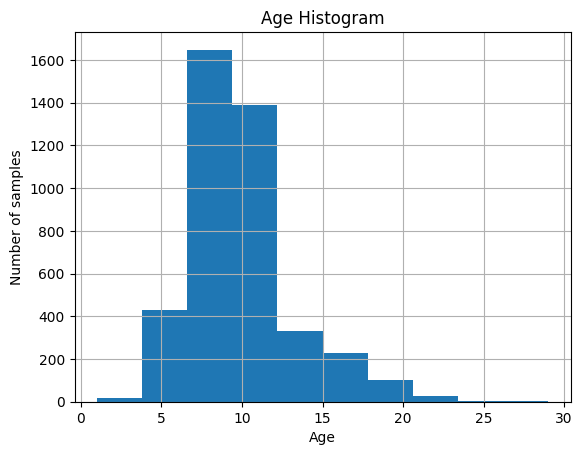

In [4]:
abalone_df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Number of samples')
plt.title('Age Histogram');

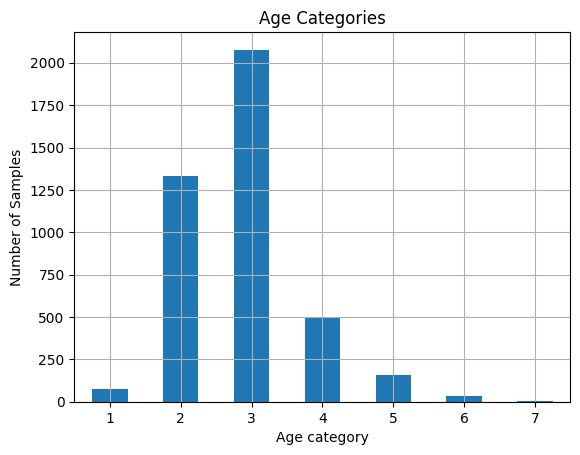

In [5]:
abalone_df["age_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Age category")
plt.ylabel("Number of Samples")
plt.title('Age Categories');

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=20, test_size=0.15, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(abalone_df, abalone_df["age_cat"]):
    strat_train_set_n = abalone_df.iloc[train_index]
    strat_test_set_n = abalone_df.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [7]:
abalone_df.drop("age_cat", axis=1, inplace=True)

In [8]:
for split_list in strat_splits:
    for set_ in split_list:
        set_.drop("age_cat", axis=1, inplace=True)

In [9]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=0, include_bias=True)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# remove warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [13]:
from sklearn.metrics import mean_squared_error
null_total_train = 0
null_total_test = 0
for strat_train_set, strat_test_set in strat_splits:
    X_train=strat_train_set.drop("Age", axis=1)
    Y_train=strat_train_set["Age"].copy()
    X_test=strat_test_set.drop("Age", axis=1)
    Y_test=strat_test_set["Age"].copy()
    
    X_train_Null=poly_features.fit_transform(X_train)
    X_test_Null=poly_features.transform(X_test)
    X_train_Null=feature_scaler.fit_transform(X_train_Null)
    X_test_Null=feature_scaler.transform(X_test_Null)
    reg = LinearRegression()
    #Training
    reg.fit(X_train_Null, Y_train)
    training_prediction = reg.predict(X_train_Null)
    mse_training = mean_squared_error(Y_train, training_prediction)
    null_total_train+=mse_training
    #testing
    testing_prediction = reg.predict(X_test_Null)
    mse_testing = mean_squared_error(Y_test, testing_prediction)
    null_total_test+=mse_testing
null_mse_training = null_total_train / 20
null_mse_testing = null_total_test / 20
print(f"Average MSE of Null model for trainig: {null_mse_training}")
print(f"Average MSE of Null model for testing: {null_mse_testing}")

Average MSE of Null model for trainig: 10.39091072803015
Average MSE of Null model for testing: 10.403594404840437


**b) OLS regression, analytic, by solving the normal equations, with $\lambda = 0.0001$. Report the average training and test $R^2$ and $MSE$. (2 points)**

by solving normal equations:

In [14]:
from sklearn.metrics import r2_score

In [15]:
l=0.0001
OLS_total_train = 0
OLS_total_test = 0
OLS_r2_total_train = 0
OLS_r2_total_test = 0
for strat_train_set, strat_test_set in strat_splits:
    X_train=strat_train_set.drop("Age", axis=1)
    Y_train=strat_train_set["Age"].copy()
    X_test=strat_test_set.drop("Age", axis=1)
    Y_test=strat_test_set["Age"].copy()
    X_train=feature_scaler.fit_transform(X_train)
    X_test=feature_scaler.transform(X_test)
    X_train=np.c_[np.ones(X_train.shape[0]),X_train]
    X_test=np.c_[np.ones(X_test.shape[0]),X_test]
    #training
    beta=np.linalg.inv((X_train.T@X_train)+(l*np.identity(X_train.shape[1])))@X_train.T@Y_train
    training_prediction = X_train@beta
    mse_training = mean_squared_error(Y_train, training_prediction)
    r2_training = r2_score(Y_train, training_prediction)
    OLS_total_train+=mse_training
    OLS_r2_total_train+=r2_training
    #testing
    testing_prediction = X_test@beta
    mse_testing = mean_squared_error(Y_test, testing_prediction)
    r2_testing = r2_score(Y_test, testing_prediction)
    OLS_total_test+=mse_testing
    OLS_r2_total_test+=r2_testing
mse_training = OLS_total_train / 20
mse_testing = OLS_total_test / 20
OLS_r2_training = OLS_r2_total_train / 20
OLS_r2_testing = OLS_r2_total_test / 20
print(f"Average MSE of OLS model for trainig: {mse_training}")
print(f"Average MSE of OLS model for testing: {mse_testing}")
print(f"Average R2 of OLS model for trainig: {OLS_r2_training}")
print(f"Average R2 of OLS model for testing: {OLS_r2_testing}")

Average MSE of OLS model for trainig: 4.889638997632354
Average MSE of OLS model for testing: 5.108685724915006
Average R2 of OLS model for trainig: 0.5294268052233922
Average R2 of OLS model for testing: 0.5087182631609768


by using Ridge function from sklearn

In [16]:
from sklearn.linear_model import Ridge

In [17]:
OLS_total_train = 0
OLS_total_test = 0
OLS_r2_total_train = 0
OLS_r2_total_test = 0
for strat_train_set, strat_test_set in strat_splits:
    
    X_train=strat_train_set.drop("Age", axis=1)
    Y_train=strat_train_set["Age"].copy()
    X_test=strat_test_set.drop("Age", axis=1)
    Y_test=strat_test_set["Age"].copy()
    X_train=feature_scaler.fit_transform(X_train)
    X_test=feature_scaler.transform(X_test)
    reg = Ridge(alpha=0.0001)
    #Training
    reg.fit(X_train, Y_train)
    training_prediction = reg.predict(X_train)
    mse_training = mean_squared_error(Y_train, training_prediction)
    r2_training = r2_score(Y_train, training_prediction)
    OLS_total_train+=mse_training
    OLS_r2_total_train+=r2_training
    #testing
    testing_prediction = reg.predict(X_test)
    mse_testing = mean_squared_error(Y_test, testing_prediction)
    r2_testing = r2_score(Y_test, testing_prediction)
    OLS_total_test+=mse_testing
    OLS_r2_total_test+=r2_testing
OLS_mse_training = OLS_total_train / 20
OLS_mse_testing = OLS_total_test / 20
OLS_r2_training = OLS_r2_total_train / 20
OLS_r2_testing = OLS_r2_total_test / 20
print(f"Average MSE of OLS model for trainig: {mse_training}")
print(f"Average MSE of OLS model for testing: {mse_testing}")
print(f"Average R2 of OLS model for trainig: {OLS_r2_training}")
print(f"Average R2 of OLS model for testing: {OLS_r2_training}")

Average MSE of OLS model for trainig: 4.926370652367323
Average MSE of OLS model for testing: 4.824325707599654
Average R2 of OLS model for trainig: 0.5294268052233998
Average R2 of OLS model for testing: 0.5294268052233998


**c) Regression tree of maximum depth 1, 2, .... up to 7, for a total of 7 regression
trees. On the same plot, plot the average training and test $R2$ vs the tree depth.
On another plot, plot the average training and test $MSE$ vs the tree depth, and
show the null model $MSE$ from a) as a horizontal line. (3 points)**

In [18]:
from sklearn.tree import DecisionTreeRegressor
max_depth_range=list(range(1,8))

In [19]:
dt_r2_training_error_list=[]
dt_r2_test_error_list=[]
dt_mse_training_error_list=[]
dt_mse_test_error_list=[]
for maximum_depth in max_depth_range:
    dt_reg=DecisionTreeRegressor(random_state=42,max_depth=maximum_depth)
    r2_total_train = 0
    r2_total_test = 0
    mse_total_train=0
    mse_total_test=0
    
    for strat_train_set, strat_test_set in strat_splits:
        X_train=strat_train_set.drop("Age", axis=1)
        Y_train=strat_train_set["Age"].copy()
        X_test=strat_test_set.drop("Age", axis=1)
        Y_test=strat_test_set["Age"].copy()
        #training
        dt_reg.fit(X_train,Y_train)
        training_prediction = dt_reg.predict(X_train)
        r2_training = r2_score(Y_train, training_prediction)
        mse_training=mean_squared_error(Y_train,training_prediction)
        r2_total_train+=r2_training
        mse_total_train+=mse_training
        #testing
        testing_prediction = dt_reg.predict(X_test)
        r2_testing = r2_score(Y_test, testing_prediction)
        mse_testing=mean_squared_error(Y_test,testing_prediction)
        r2_total_test+=r2_testing
        mse_total_test+=mse_testing
        
    dt_r2_training_error_list.append(r2_total_train/20)
    dt_r2_test_error_list.append(r2_total_test/20)
    dt_mse_training_error_list.append(mse_total_train/20)
    dt_mse_test_error_list.append(mse_total_test/20)
  

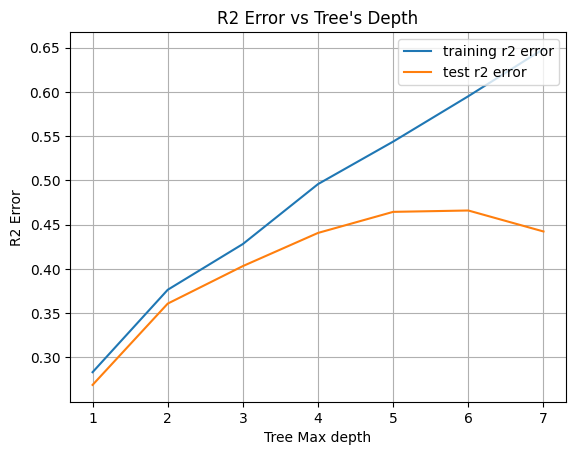

In [20]:
plt.plot(max_depth_range,dt_r2_training_error_list,label="training r2 error")
plt.plot(max_depth_range,dt_r2_test_error_list,label="test r2 error")
plt.grid(True)
plt.title("R2 Error vs Tree's Depth")
plt.legend(loc="upper right")
plt.xlabel('Tree Max depth')
plt.ylabel('R2 Error');

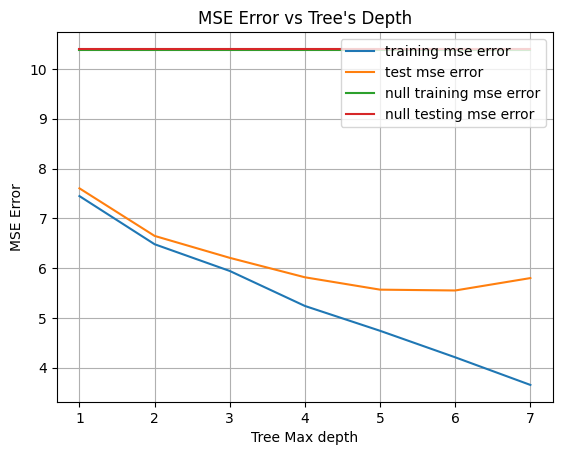

In [21]:
plt.plot(max_depth_range,dt_mse_training_error_list,label="training mse error")
plt.plot(max_depth_range,dt_mse_test_error_list,label="test mse error")
plt.plot(max_depth_range,[null_mse_training]*len(max_depth_range),label="null training mse error")
plt.plot(max_depth_range,[null_mse_testing]*len(max_depth_range),label="null testing mse error")
plt.grid(True)
plt.title("MSE Error vs Tree's Depth")
plt.legend(loc="upper right")
plt.xlabel('Tree Max depth')
plt.ylabel('MSE Error');

**d) Random forest regression with 10, 30, 100 and 300 trees. Report the average training and test $R^2$ and $MSE$ in each case. (3 points)**

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
number_trees = [10, 30, 100, 300]
rf_r2_training_error_list=[]
rf_r2_test_error_list=[]
rf_mse_training_error_list=[]
rf_mse_test_error_list=[]
for num in number_trees:
    rf_reg=RandomForestRegressor(random_state=42, n_estimators = num,n_jobs=-1)
    r2_total_train = 0
    r2_total_test = 0
    mse_total_train=0
    mse_total_test=0
    
    for strat_train_set, strat_test_set in strat_splits:
        X_train=strat_train_set.drop("Age", axis=1)
        Y_train=strat_train_set["Age"].copy()
        X_test=strat_test_set.drop("Age", axis=1)
        Y_test=strat_test_set["Age"].copy()
        #training
        rf_reg.fit(X_train,Y_train)
        training_prediction = rf_reg.predict(X_train)
        r2_training = r2_score(Y_train, training_prediction)
        mse_training=mean_squared_error(Y_train,training_prediction)
        r2_total_train+=r2_training
        mse_total_train+=mse_training
        #testing
        testing_prediction = rf_reg.predict(X_test)
        r2_testing = r2_score(Y_test, testing_prediction)
        mse_testing=mean_squared_error(Y_test,testing_prediction)
        r2_total_test+=r2_testing
        mse_total_test+=mse_testing
        
    rf_r2_training_error_list.append(r2_total_train/20)
    rf_r2_test_error_list.append(r2_total_test/20)
    rf_mse_training_error_list.append(mse_total_train/20)
    rf_mse_test_error_list.append(mse_total_test/20)
  

In [43]:
for i,j in zip(number_trees,rf_r2_training_error_list):
    print(f"Average R2 of Random Forest model with {i} trees for training is: {j}")

Average R2 of Random Forest model with 10 trees for training is: 0.9111683936821299
Average R2 of Random Forest model with 30 trees for training is: 0.9283945226609521
Average R2 of Random Forest model with 100 trees for training is: 0.9349601292735535
Average R2 of Random Forest model with 300 trees for training is: 0.9368683896085284


In [40]:
for i,j in zip(number_trees,rf_r2_test_error_list):
    print(f"Average R2 of Random Forest model with {i} trees for testing is: {j}")

Average R2 of Random Forest model with 10 trees for testing is: 0.4944920109951084
Average R2 of Random Forest model with 30 trees for testing is: 0.5221292417899929
Average R2 of Random Forest model with 100 trees for testing is: 0.5337495387718655
Average R2 of Random Forest model with 300 trees for testing is: 0.5366580822782064


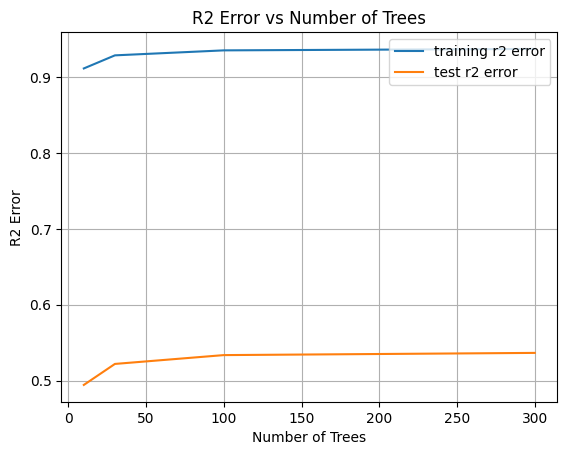

In [26]:
plt.plot(number_trees,rf_r2_training_error_list,label="training r2 error")
plt.plot(number_trees,rf_r2_test_error_list,label="test r2 error")
plt.grid(True)
plt.title("R2 Error vs Number of Trees")
plt.legend(loc="upper right")
plt.xlabel('Number of Trees')
plt.ylabel('R2 Error');

In [44]:
for i,j in zip(number_trees,rf_mse_training_error_list):
    print(f"Average MSE of Random Forest model with {i} trees for training is: {j}")

Average MSE of Random Forest model with 10 trees for training is: 0.9230091549295778
Average MSE of Random Forest model with 30 trees for training is: 0.744039248826291
Average MSE of Random Forest model with 100 trees for training is: 0.6758221549295774
Average MSE of Random Forest model with 300 trees for training is: 0.6559915087636932


In [45]:
for i,j in zip(number_trees,rf_mse_test_error_list):
    print(f"Average MSE of Random Forest model with {i} trees for testing is: {j}")

Average MSE of Random Forest model with 10 trees for testing is: 5.254644338118022
Average MSE of Random Forest model with 30 trees for testing is: 4.967759613680667
Average MSE of Random Forest model with 100 trees for testing is: 4.847018006379586
Average MSE of Random Forest model with 300 trees for testing is: 4.817010808080807


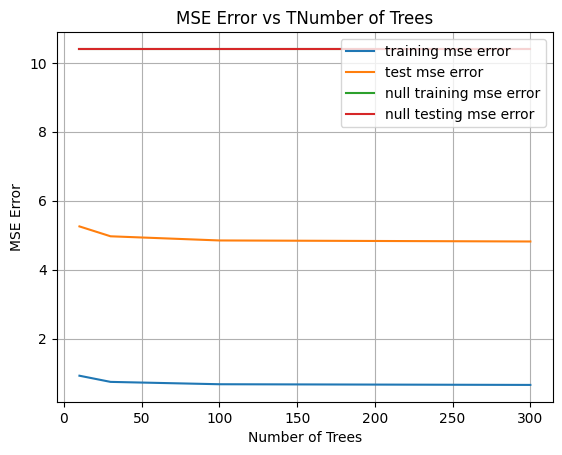

In [27]:
plt.plot(number_trees,rf_mse_training_error_list,label="training mse error")
plt.plot(number_trees,rf_mse_test_error_list,label="test mse error")
plt.plot(number_trees,[null_mse_training]*len(number_trees),label="null training mse error")
plt.plot(number_trees,[null_mse_testing]*len(number_trees),label="null testing mse error")
plt.grid(True)
plt.title("MSE Error vs TNumber of Trees")
plt.legend(loc="upper right")
plt.xlabel('Number of Trees') 
plt.ylabel('MSE Error');